File for work related to the organisation matched between LittleSis and bipartite-all010420

In [36]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import pickle
# import seaborn as sns

#### Read data

In [2]:
data = pd.read_csv(os.getcwd() + '/Data/matched_littlesis_bipartite171120.csv')
data.rename(columns = {'Unnamed: 0': 'ls_id', 'gs_match_id': 'bp_id'}, inplace = True)
data.shape

(78526, 5)

In [3]:
data.head()

,ls_id,name,bp_id,match_name,match_value
0,1,WALMART,NaN,NaN,0.000000
1,2,EXXONMOBIL,NaN,NaN,0.000000
2,3,CHEVRON,NaN,NaN,0.000000
3,4,GENERAL MOTORS COMPANY,7091108.0,COMPANY C,0.384754
4,5,CONOCOPHILLIPS,NaN,NaN,0.000000


* ls_id: LittleSis entity ID
* name: LittleSis entity name
* bp_id: bipartite-all ID of matched org
* match_name: bipartite-all name of matched org
* match_value: score of the match in range \[0, 1] 

In [4]:
ents = pd.read_pickle(os.getcwd() + '/Pickle/all_entities.pkl')
ents.shape

(284500, 13)

In [5]:
ents.head()

,summary,parent_id,extensions,website,name,primary_ext,aliases,blurb,types,updated_at,id,start_date,end_date
1,None,NaN,"{'Org': {'name_nick': 'WAL-MART', 'name': 'Wal...",www.corporate.walmart.com,Walmart,Org,"[IRS EIN 71-0415188, Wal Mart, Wal-Mart, Wal-M...",Retail merchandising,"[Organization, Business, Public Company]",2020-06-30T20:47:43Z,1,None,None
2,None,NaN,"{'Org': {'name_nick': 'EXXONMOBIL', 'name': 'E...",http://www.exxonmobil.com,ExxonMobil,Org,"[Exxon Corporation, Exxon Mobil, Exxon Mobil C...","Oil and gas exploration, production, and marke...","[Organization, Business, Public Company]",2020-07-14T02:29:21Z,2,1882-00-00,None
3,None,NaN,"{'Org': {'name_nick': 'CHEVRON', 'name': 'Chev...",www.chevron.com,Chevron,Org,"[Chevron, Chevron Corporation, ChevronTexaco, ...",Energy Company,"[Organization, Business, Public Company]",2020-07-14T02:27:36Z,3,None,None
4,None,NaN,"{'Org': {'name_nick': 'GEN-MOTOR', 'name': 'Ge...",www.gm.com,General Motors Company,Org,"[General Motors, General Motors Company, Gener...",automobile manufacturer,"[Organization, Business, Public Company]",2020-06-16T01:28:05Z,4,1908-00-00,2011-03-31
5,None,NaN,"{'Org': {'name_nick': 'CONOCOPHIL', 'name': 'C...",http://www.conocophillips.com/,ConocoPhillips,Org,"[Conoco Inc., ConocoPhillips, ConocoPhillips H...",Texas-based oil and gas corporation,"[Organization, Business, Public Company]",2020-06-11T14:26:07Z,5,None,None


In [6]:
rels = pd.read_pickle(os.getcwd() + '/Pickle/all_rels.pkl')
rels.shape

(1230815, 15)

In [7]:
rels.head()

,category_id,description2,id,description,entity1_id,is_current,updated_at,entity2_id,currency,start_date,amount,goods,description1,end_date,filings
1,1,Director,1,Allen I Questrom had a position (Director) at...,1006,False,2011-03-13T20:15:59Z,1,None,2007-00-00,NaN,None,Director,2010-06-00,NaN
2,1,Director,2,Linda S Wolf has a position (Director) at Wa...,1007,True,2008-11-05T17:05:10Z,1,None,2005-00-00,NaN,None,Director,None,NaN
3,1,Director,3,Aida M Alvarez had a position (Director) at ...,1008,False,2018-04-23T14:25:16Z,1,None,None,NaN,None,Director,2015-00-00,NaN
4,1,Chairman,4,Gregory Boyd Penner has/had a position (Vice ...,1009,None,2018-04-23T14:54:35Z,1,None,None,NaN,None,Vice Chairman,None,NaN
6,1,Director,6,Christopher J Williams had a position (Direct...,1011,False,2015-03-31T14:56:50Z,1,None,2004-00-00,NaN,None,Director,None,NaN


In [8]:
bipartite_all = nx.read_gpickle(os.getcwd() + '/Pickle/bipartite-all010420.pickle')
bipartite_all.number_of_nodes()

4054832

In [9]:
bipartite_all.nodes[7091108]

{'degree': 7,
 'assets_total': 33697.0,
 'revenue_investments': '0.0',
 'rev_govt_grants': 0.0,
 'naics_code': '711120',
 'year_founded': nan,
 'address_line_1': 'P.O. Box 23262',
 'num_employees': 1.0,
 'city': 'Pleasant Hill',
 'expenses_total': 207670.0,
 'total_revenue': 210114.0,
 'sic_code': '7922',
 'deductibility_code': '1',
 'zip': '94523',
 'ntee_code': 'A63',
 'bipartite': 0,
 'state': 'CA',
 'Uppername': 'COMPANY C',
 'num_volunteers': nan,
 'ein': '22-3865899',
 'revenue_contributions': 174533.0,
 'employees_over_100k': 0.0}

Summary plots:

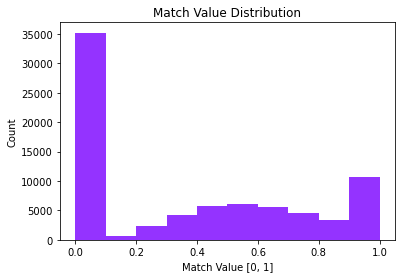

In [10]:
plt.hist(data['match_value'], color = '#9433ff')
# plt.yscale('log')
plt.title('Match Value Distribution')
plt.xlabel('Match Value [0, 1]')
plt.ylabel('Count')
plt.show()
plt.close()

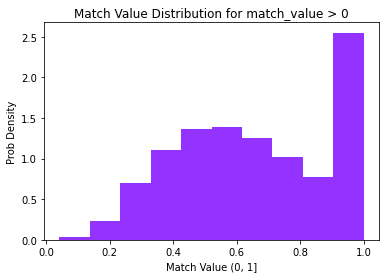

In [11]:
plt.hist(data[data['match_value'] > 0]['match_value'], density = True, color = '#9433ff')
plt.title('Match Value Distribution for match_value > 0')
plt.xlabel('Match Value (0, 1]')
plt.ylabel('Prob Density')
plt.show()
plt.close()

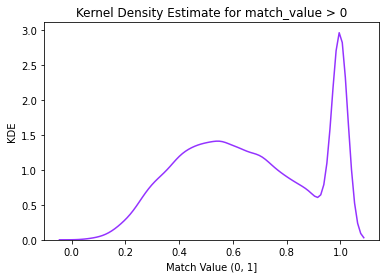

In [12]:
sns.distplot(data[data['match_value'] > 0]['match_value'], kde = True, hist = False, color = '#9433ff')
plt.title('Kernel Density Estimate for match_value > 0')
plt.xlabel('Match Value (0, 1]')
plt.ylabel('KDE')
plt.show()
plt.close()

Drop rows where match_value == 0 i.e. match_name is NaN:

In [13]:
data = data[data['match_value'] > 0]
data['bp_id'] = data['bp_id'].apply(lambda x: None if np.isnan(x) else int(x))  # convert bp_id from float to int
print(data.shape)
data.head()

(43358, 5)


,ls_id,name,bp_id,match_name,match_value
3,4,GENERAL MOTORS COMPANY,7091108,COMPANY C,0.384754
8,9,BANK OF AMERICA CORPORATION,8294825,HOUSING CORPORATION OF AMERICA,0.580073
10,11,BERKSHIRE HATHAWAY INC,6823250,BERKSHIRE FUND INC,0.556410
11,12,JPMORGAN CHASE & CO,6930339,TIFFANY & CO FOUNDATION,0.174680
12,13,AMERICAN INTERNATIONAL GROUP INC,7798912,AMERICAN MEDICAL GROUP ASSOCIATION INC,0.645161


In [14]:
data['match_value'].describe()

count    43358.000000
mean         0.661962
std          0.245385
min          0.041470
25%          0.463763
50%          0.644872
75%          0.896434
max          1.000000
Name: match_value, dtype: float64

Left join with LittleSis entity data:

In [15]:
data = data.join(ents.rename(columns = {'id': 'ls_id'}).set_index('ls_id'), on = 'ls_id', lsuffix = '_left', rsuffix = '_right')
data.head()

,ls_id,name_left,bp_id,match_name,match_value,summary,parent_id,extensions,website,name_right,primary_ext,aliases,blurb,types,updated_at,start_date,end_date
3,4,GENERAL MOTORS COMPANY,7091108,COMPANY C,0.384754,None,NaN,"{'Org': {'name_nick': 'GEN-MOTOR', 'name': 'Ge...",www.gm.com,General Motors Company,Org,"[General Motors, General Motors Company, Gener...",automobile manufacturer,"[Organization, Business, Public Company]",2020-06-16T01:28:05Z,1908-00-00,2011-03-31
8,9,BANK OF AMERICA CORPORATION,8294825,HOUSING CORPORATION OF AMERICA,0.580073,None,NaN,"{'Org': {'name_nick': 'BOA', 'name': 'Bank of ...",www.bankofamerica.com,Bank of America Corporation,Org,"[Bank of America, Bank of America Corp, Bank o...",The largest bank holding company in the United...,"[Organization, Business, Public Company]",2020-07-05T01:53:00Z,None,None
10,11,BERKSHIRE HATHAWAY INC,6823250,BERKSHIRE FUND INC,0.556410,None,NaN,"{'Org': {'name_nick': 'BERKSHIRE', 'name': 'Be...",www.berkshirehathaway.com,Berkshire Hathaway Inc.,Org,"[Berkshire Hathaway, Berkshire Hathaway Inc.]","Holding company headquartered in Omaha, Nebraska","[Organization, Business, Public Company]",2020-05-28T20:55:40Z,None,None
11,12,JPMORGAN CHASE & CO,6930339,TIFFANY & CO FOUNDATION,0.174680,None,NaN,"{'Org': {'name_nick': 'JPMORGAN2', 'name': 'JP...",www.jpmorganchase.com,JPMorgan Chase & Co.,Org,"[BHC ID 1039502, Chase Manhattan Corporation, ...",A multinational banking corporation | World's ...,"[Organization, Business, Public Company]",2020-07-09T16:27:38Z,1968-00-00,None
12,13,AMERICAN INTERNATIONAL GROUP INC,7798912,AMERICAN MEDICAL GROUP ASSOCIATION INC,0.645161,None,NaN,"{'Org': {'name_nick': 'AM-INT_GRP', 'name': 'A...",www.aig.com,"American International Group, Inc.",Org,"[AIG, American International Group, American I...",Global insurance company,"[Organization, Business, Public Company]",2020-07-05T23:54:57Z,1919-00-00,None


Keep rows of types we're interested in:

In [16]:
def filterByType(df):  # returns indices of rows that satisfy the filter by 'type' criterion
    reqd_types = ['Philanthropy', 'Other Not-for-Profit', 'Academic Research Institute', 'School', 'Cultural/Arts', 'Policy/Think Tank']  # 'Academic' has been removed
    
    df_exploded = df.explode('types')
    
    reqd_ls_id = df_exploded[df_exploded['types'].isin(reqd_types)]['ls_id'].unique()
    
    return df[df['ls_id'].isin(reqd_ls_id)]

In [17]:
filtered_data = filterByType(data)
filtered_data = filtered_data.drop(columns = ['name_right']).rename(columns = {'name_left': 'name'})
print(filtered_data.shape)
filtered_data.head()

(7454, 16)


,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date
1236,14713,HARVARD LAW SCHOOL,6822486,HARVARD LAW REVIEW ASSOCIATION,0.705592,None,14730.0,"{'Org': {'name_nick': None, 'name': 'Harvard L...",http://www.law.harvard.edu,Org,"[Harvard Law School, Harvard University Law Sc...",None,"[Organization, School]",2020-07-12T23:23:57Z,None,None
1252,14730,HARVARD UNIVERSITY,6830462,HARVARD UNIVERSITY BAND INC,0.853769,None,NaN,"{'Org': {'name_nick': None, 'name': 'Harvard U...",http://www.harvard.edu,Org,"[Harvard College, Harvard Corporation, Harvard...","Elite private university located in Cambridge, MA","[Organization, School]",2020-07-12T23:50:00Z,1636-00-00,None
1284,14922,UNIVERSITY OF NEBRASKA LINCOLN,8904282,UNIVERSITY PROGRAM COUNCIL UNIVERSITY OF NEBRA...,0.844771,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",None,Org,"[University of Nebraska - Lincoln, University ...",None,"[Organization, School]",2019-12-13T19:33:21Z,None,None
1285,14924,COLUMBIA UNIVERSITY,7871420,COLUMBIA INTERNATIONAL UNIVERSITY,0.909055,Columbia University was founded in 1754 as Kin...,NaN,"{'Org': {'name_nick': None, 'name': 'Columbia ...",http://www.columbia.edu/index.html,Org,"[Columbia University, Columbia University in t...",Oldest institution of higher learning in the s...,"[Organization, School]",2020-07-10T18:37:07Z,1754-00-00,None
1286,14925,UNIVERSITY OF ILLINOIS,7513160,UNIVERSITY OF ILLINOIS FOUNDATION,0.961337,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",http://www.uillinois.edu/,Org,"[University of Illinois, University of Illinoi...",One of the original 37 public land-grant insti...,"[Organization, School]",2020-05-04T14:54:31Z,1867-00-00,None


Execute the cell below only if you want to re-run the code, else read the pickle file

In [59]:
filtered_data['ls_rels'] = filtered_data['ls_id'].apply(lambda x: rels[rels['entity1_id'].isin([x]) | rels['entity2_id'].isin([x])].shape[0])
filtered_data['bp_rels'] = filtered_data['bp_id'].apply(lambda x: bipartite_all.nodes[x]['degree'])
filtered_data.head()

,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date,ls_rels,bp_rels
1236,14713,HARVARD LAW SCHOOL,6822486,HARVARD LAW REVIEW ASSOCIATION,0.705592,None,14730.0,"{'Org': {'name_nick': None, 'name': 'Harvard L...",http://www.law.harvard.edu,Org,"[Harvard Law School, Harvard University Law Sc...",None,"[Organization, School]",2020-07-12T23:23:57Z,None,None,711,9
1252,14730,HARVARD UNIVERSITY,6830462,HARVARD UNIVERSITY BAND INC,0.853769,None,NaN,"{'Org': {'name_nick': None, 'name': 'Harvard U...",http://www.harvard.edu,Org,"[Harvard College, Harvard Corporation, Harvard...","Elite private university located in Cambridge, MA","[Organization, School]",2020-07-12T23:50:00Z,1636-00-00,None,931,7
1284,14922,UNIVERSITY OF NEBRASKA LINCOLN,8904282,UNIVERSITY PROGRAM COUNCIL UNIVERSITY OF NEBRA...,0.844771,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",None,Org,"[University of Nebraska - Lincoln, University ...",None,"[Organization, School]",2019-12-13T19:33:21Z,None,None,18,5
1285,14924,COLUMBIA UNIVERSITY,7871420,COLUMBIA INTERNATIONAL UNIVERSITY,0.909055,Columbia University was founded in 1754 as Kin...,NaN,"{'Org': {'name_nick': None, 'name': 'Columbia ...",http://www.columbia.edu/index.html,Org,"[Columbia University, Columbia University in t...",Oldest institution of higher learning in the s...,"[Organization, School]",2020-07-10T18:37:07Z,1754-00-00,None,406,18
1286,14925,UNIVERSITY OF ILLINOIS,7513160,UNIVERSITY OF ILLINOIS FOUNDATION,0.961337,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",http://www.uillinois.edu/,Org,"[University of Illinois, University of Illinoi...",One of the original 37 public land-grant insti...,"[Organization, School]",2020-05-04T14:54:31Z,1867-00-00,None,147,34


In [18]:
# filtered_data.to_pickle(os.getcwd() + '/Pickle/filtered_org_match.pkl')
# print('Done')

In [19]:
filtered_data = pd.read_pickle(os.getcwd() + '/Pickle/filtered_org_match.pkl')
filtered_data.shape

(7454, 18)

In [20]:
filtered_data.head()

,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date,ls_rels,bp_rels
1236,14713,HARVARD LAW SCHOOL,6822486,HARVARD LAW REVIEW ASSOCIATION,0.705592,None,14730.0,"{'Org': {'name_nick': None, 'name': 'Harvard L...",http://www.law.harvard.edu,Org,"[Harvard Law School, Harvard University Law Sc...",None,"[Organization, School]",2020-07-12T23:23:57Z,None,None,711,9
1252,14730,HARVARD UNIVERSITY,6830462,HARVARD UNIVERSITY BAND INC,0.853769,None,NaN,"{'Org': {'name_nick': None, 'name': 'Harvard U...",http://www.harvard.edu,Org,"[Harvard College, Harvard Corporation, Harvard...","Elite private university located in Cambridge, MA","[Organization, School]",2020-07-12T23:50:00Z,1636-00-00,None,931,7
1284,14922,UNIVERSITY OF NEBRASKA LINCOLN,8904282,UNIVERSITY PROGRAM COUNCIL UNIVERSITY OF NEBRA...,0.844771,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",None,Org,"[University of Nebraska - Lincoln, University ...",None,"[Organization, School]",2019-12-13T19:33:21Z,None,None,18,5
1285,14924,COLUMBIA UNIVERSITY,7871420,COLUMBIA INTERNATIONAL UNIVERSITY,0.909055,Columbia University was founded in 1754 as Kin...,NaN,"{'Org': {'name_nick': None, 'name': 'Columbia ...",http://www.columbia.edu/index.html,Org,"[Columbia University, Columbia University in t...",Oldest institution of higher learning in the s...,"[Organization, School]",2020-07-10T18:37:07Z,1754-00-00,None,406,18
1286,14925,UNIVERSITY OF ILLINOIS,7513160,UNIVERSITY OF ILLINOIS FOUNDATION,0.961337,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",http://www.uillinois.edu/,Org,"[University of Illinois, University of Illinoi...",One of the original 37 public land-grant insti...,"[Organization, School]",2020-05-04T14:54:31Z,1867-00-00,None,147,34


Filtered data distros:

In [21]:
filtered_data.explode('types')['types'].value_counts()  # breakdown of ALL types for filtered_data

Organization                       7454
Other Not-for-Profit               2939
School                             2719
Philanthropy                       1690
Policy/Think Tank                   333
Cultural/Arts                       193
Membership Organization             147
Business                             95
Industry/Trade Association           83
Government Body                      75
Academic Research Institute          35
Media Organization                   28
Lobbying Firm                        27
Private Company                      24
Government-Sponsored Enterprise      23
Political Fundraising Committee      18
Professional Association             17
PAC                                  13
Social Club                          10
Public Relations Firm                 8
Government Advisory Body              7
Other Campaign Committee              7
Elite Consensus Group                 6
Consulting Firm                       6
Public Company                        3


In [22]:
filtered_data['match_value'].describe()

count    7454.000000
mean        0.817488
std         0.227198
min         0.049361
25%         0.663917
50%         0.944788
75%         1.000000
max         1.000000
Name: match_value, dtype: float64

In [23]:
filtered_data['match_value'].median()

0.9447883265046477

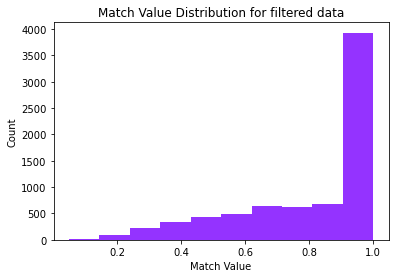

In [24]:
plt.hist(filtered_data['match_value'], density = False, color = '#9433ff')
plt.title('Match Value Distribution for filtered data')
plt.xlabel('Match Value')
plt.ylabel('Count')
# plt.ylabel('Prob Density')
plt.show()
plt.close()

Thresholding on match_value:

In [25]:
threshold = 0.7  # match_value threshold

In [26]:
filtered_data[filtered_data['match_value'] > threshold]

,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date,ls_rels,bp_rels
1236,14713,HARVARD LAW SCHOOL,6822486,HARVARD LAW REVIEW ASSOCIATION,0.705592,None,14730.0,"{'Org': {'name_nick': None, 'name': 'Harvard L...",http://www.law.harvard.edu,Org,"[Harvard Law School, Harvard University Law Sc...",None,"[Organization, School]",2020-07-12T23:23:57Z,None,None,711,9
1252,14730,HARVARD UNIVERSITY,6830462,HARVARD UNIVERSITY BAND INC,0.853769,None,NaN,"{'Org': {'name_nick': None, 'name': 'Harvard U...",http://www.harvard.edu,Org,"[Harvard College, Harvard Corporation, Harvard...","Elite private university located in Cambridge, MA","[Organization, School]",2020-07-12T23:50:00Z,1636-00-00,None,931,7
1284,14922,UNIVERSITY OF NEBRASKA LINCOLN,8904282,UNIVERSITY PROGRAM COUNCIL UNIVERSITY OF NEBRA...,0.844771,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",None,Org,"[University of Nebraska - Lincoln, University ...",None,"[Organization, School]",2019-12-13T19:33:21Z,None,None,18,5
1285,14924,COLUMBIA UNIVERSITY,7871420,COLUMBIA INTERNATIONAL UNIVERSITY,0.909055,Columbia University was founded in 1754 as Kin...,NaN,"{'Org': {'name_nick': None, 'name': 'Columbia ...",http://www.columbia.edu/index.html,Org,"[Columbia University, Columbia University in t...",Oldest institution of higher learning in the s...,"[Organization, School]",2020-07-10T18:37:07Z,1754-00-00,None,406,18
1286,14925,UNIVERSITY OF ILLINOIS,7513160,UNIVERSITY OF ILLINOIS FOUNDATION,0.961337,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",http://www.uillinois.edu/,Org,"[University of Illinois, University of Illinoi...",One of the original 37 public land-grant insti...,"[Organization, School]",2020-05-04T14:54:31Z,1867-00-00,None,147,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78425,380572,NIPPON FOUNDATION,6921248,NIPPON EXPRESS FOUNDATION INC,0.793950,None,NaN,"{'Org': {'name_nick': None, 'name': 'Nippon Fo...",None,Org,[Nippon Foundation],None,"[Organization, Philanthropy]",2020-07-14T02:31:22Z,None,None,1,3
78439,380598,SUNY ROCKLAND COMMUNITY COLLEGE,7073431,ROCKLAND COMMUNITY COLLEGE FOUNDATION INC,0.718448,None,NaN,"{'Org': {'name_nick': None, 'name': 'SUNY Rock...",None,Org,[SUNY Rockland Community College],a New York community college,"[Organization, School]",2020-07-14T11:57:59Z,None,None,1,27
78441,380600,FRIENDS SELECT SCHOOL,7100375,FRIENDS SELECT SCHOOL,1.000000,None,NaN,"{'Org': {'name_nick': None, 'name': 'Friends S...",None,Org,[Friends Select School],a Philadelphia private school,"[Organization, School]",2020-07-14T12:10:05Z,None,None,1,23
78467,380699,LIVING BEYOND BREAST CANCER,7117763,LIVING BEYOND BREAST CANCER,1.000000,None,NaN,"{'Org': {'name_nick': None, 'name': 'Living Be...",None,Org,[Living Beyond Breast Cancer],provides support to those impacted by breast c...,"[Organization, Other Not-for-Profit]",2020-07-14T20:21:48Z,None,None,1,33


EIN extraction:

In [27]:
ein_present = filtered_data.explode('aliases')['aliases'].apply(lambda x: x if sum(i.isdigit() for i in x) == 9 else None).dropna().index.unique()  # get index values for rows with EIN in aliases; EIN is a 9 digit numeric value, hence sum(i.isdigit() for i in x) == 9
filtered_data.loc[ein_present].shape

(39, 18)

1. Combine with bipartite-all, check relationships

2. Relationships beyond philanthropies

3. Case studies: NEU, Rockefeller, Bill and Melinda Gates Foundation  <-- PRIORITY

In [28]:
cats = pd.Series(['Position', 'Education', 'Membership', 'Family', 'Donation', 'Transaction', 'Lobbying', 'Social', 'Professional', 'Ownership', 'Hierarchy', 'Generic'], index = range(1, 13))  # LittleSis categories and IDs
cats

1         Position
2        Education
3       Membership
4           Family
5         Donation
6      Transaction
7         Lobbying
8           Social
9     Professional
10       Ownership
11       Hierarchy
12         Generic
dtype: object

In [29]:
filtered_data.sort_values(by = 'ls_rels', ascending = False).head()

,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date,ls_rels,bp_rels
14776,66860,WALTON FAMILY FOUNDATION INC,9439683,WALTON FAMILY FOUNDATION,1.000000,None,NaN,"{'Org': {'name_nick': None, 'name': 'Walton Fa...",None,Org,[Walton Family Foundation Inc],Philanthropic foundation affiliated with famil...,"[Organization, Philanthropy]",2020-06-08T21:54:09Z,None,None,1174,2
1252,14730,HARVARD UNIVERSITY,6830462,HARVARD UNIVERSITY BAND INC,0.853769,None,NaN,"{'Org': {'name_nick': None, 'name': 'Harvard U...",http://www.harvard.edu,Org,"[Harvard College, Harvard Corporation, Harvard...","Elite private university located in Cambridge, MA","[Organization, School]",2020-07-12T23:50:00Z,1636-00-00,None,931,7
6381,33342,HARVARD BUSINESS SCHOOL,6840548,HARVARD BUSINESS SCHOOL WOMENS ASSOCIATION,0.850799,None,14730.0,"{'Org': {'name_nick': None, 'name': 'Harvard B...",None,Org,"[Harvard Business School, Harvard Graduate Sch...",None,"[Organization, School]",2020-07-15T02:51:47Z,None,None,920,7
10576,41893,HEARTLAND INSTITUTE,7490071,HEARTLAND INSTITUTE,1.000000,The Heartland Institute is a national nonprofi...,NaN,"{'Org': {'name_nick': None, 'name': 'Heartland...",None,Org,[Heartland Institute],Non-profit research and education organization...,"[Organization, Other Not-for-Profit, Policy/Th...",2020-05-11T00:38:01Z,None,None,840,21
1301,14952,YALE UNIVERSITY,6866406,YALE UNIVERSITY,1.000000,None,NaN,"{'Org': {'name_nick': None, 'name': 'Yale Univ...",http://www.yale.edu,Org,"[Yale College, Yale University]",Private Ivy League research university in New ...,"[Organization, School]",2020-07-14T16:54:52Z,1701-00-00,None,756,35


In [30]:
filtered_data.sort_values(by = 'bp_rels', ascending = False).head()

,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date,ls_rels,bp_rels
9850,40390,BAY AREA COUNCIL ECONOMIC INSTITUTE,7204643,BAY AREA COUNCIL,0.763614,None,NaN,"{'Org': {'name_nick': None, 'name': 'Bay Area ...",None,Org,[Bay Area Council Economic Institute],Economic think tank,"[Organization, Policy/Think Tank]",2011-11-21T16:34:20Z,None,None,1,263
6656,33913,CHADRON STATE COLLEGE,7213166,CHADRON STATE FOUNDATION,0.890783,None,NaN,"{'Org': {'name_nick': None, 'name': 'Chadron S...",None,Org,[Chadron State College],None,"[Organization, School]",2014-10-01T10:47:47Z,None,None,3,240
25649,109410,PENNSYLVANIA BUILDERS ASSOCIATION,7103025,PENNSYLVANIA BUILDERS ASSOCIATION,1.000000,None,NaN,"{'Org': {'name_nick': None, 'name': 'Pennsylva...",None,Org,[Pennsylvania Builders Association],Building trade organization,"[Organization, Other Not-for-Profit, Industry/...",2012-11-30T11:00:00Z,None,None,1,223
8570,38098,DANA FARBER CANCER INSTITUTE,6822382,DANA FARBER CANCER INSTITUTE INC,1.000000,None,NaN,"{'Org': {'name_nick': None, 'name': '', 'fedsp...",None,Org,[Dana-Farber Cancer Institute],None,"[Organization, Other Not-for-Profit]",2018-05-02T10:58:36Z,None,None,77,221
8881,38769,ANTI DEFAMATION LEAGUE,6908098,ANTI DEFAMATION LEAGUE,1.000000,None,NaN,"{'Org': {'name_nick': None, 'name': 'Anti-Defa...",None,Org,"[Anti-Defamation League, Anti-Defamation Leagu...",Advocacy not-for-profit,"[Organization, Other Not-for-Profit]",2020-06-27T00:44:32Z,None,None,66,199


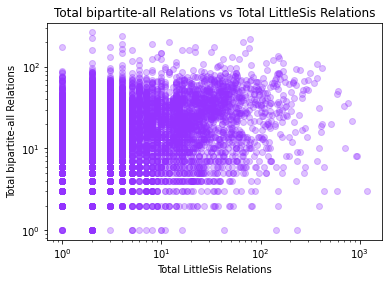

In [34]:
plt.scatter(filtered_data['ls_rels'] + 1, filtered_data['bp_rels'] + 1, c = '#9433ff', alpha = 0.3)
plt.xscale('log')
plt.yscale('log')
plt.title('Total bipartite-all Relations vs Total LittleSis Relations')
plt.xlabel('Total LittleSis Relations')
plt.ylabel('Total bipartite-all Relations')
plt.show()
plt.close()

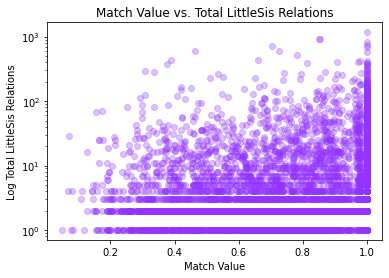

In [31]:
plt.scatter(filtered_data['match_value'], filtered_data['ls_rels'] + 1, c = '#9433ff', alpha = 0.3)
plt.yscale('log')
plt.title('Match Value vs. Total LittleSis Relations')
plt.xlabel('Match Value')
plt.ylabel('Log Total LittleSis Relations')
plt.show()
plt.close()

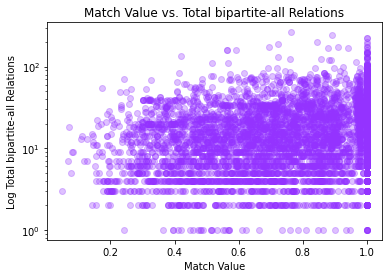

In [32]:
plt.scatter(filtered_data['match_value'], filtered_data['bp_rels'] + 1, c = '#9433ff', alpha = 0.3)
plt.yscale('log')
plt.title('Match Value vs. Total bipartite-all Relations')
plt.xlabel('Match Value')
plt.ylabel('Log Total bipartite-all Relations')
plt.show()
plt.close()

In [37]:
matched_names_res = {}

with open(os.getcwd() + '/Pickle/matched_names.pickle', 'rb') as pkl:
    matched_names_res = pickle.load(pkl)
    
len(matched_names_res)

118659

In [54]:
matched_name_df = pd.DataFrame(list(matched_names_res.items())).rename(columns = {0: 'ls_id', 1: 'bp_ids_list'})  # create df of matched name IDs
matched_name_df.shape

(118659, 2)

In [55]:
matched_name_df.head()

,ls_id,bp_ids_list
0,262146,[998678]
1,262147,[636330]
2,262150,"[934460, 3191192]"
3,262154,[638094]
4,262157,[1646651]


#### Case Study 1: Northeastern University

In [38]:
neu_ls_id = 15367
neu_bp_id = 6819740

filtered_data[filtered_data['ls_id'] == neu_ls_id]

,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date,ls_rels,bp_rels
1435,15367,NORTHEASTERN UNIVERSITY,6819740,NORTHEASTERN UNIVERSITY,1.0,None,NaN,"{'Org': {'name_nick': None, 'name': 'Northeast...",None,Org,[Northeastern University],None,"[Organization, School]",2020-06-15T21:58:42Z,None,None,79,69


In [39]:
neu_ls_rels = rels[rels['entity1_id'].isin([neu_ls_id]) | rels['entity2_id'].isin([neu_ls_id])]  # df of Northeastern relationships
neu_ls_rels.shape

(79, 15)

In [40]:
bipartite_all.nodes[neu_bp_id]['degree']

69

Relationship categoy breakdown:

In [41]:
pd.concat([neu_ls_rels['category_id'].value_counts(), cats], axis = 1).rename(columns = {'category_id': 'count', 0: 'category'}).sort_values(by = 'count', ascending = False).dropna()

,count,category
2,49.0,Education
1,22.0,Position
12,3.0,Generic
5,2.0,Donation
6,2.0,Transaction
11,1.0,Hierarchy


Sample of education and position relationships:

In [42]:
for i in [2, 1]:  # reqd relationship categories
    for j in neu_ls_rels[neu_ls_rels['category_id'] == i].sample(n = 10)['description']:  # taking a sample of size 10
        print(j)
    print('-' * 15)

Navjeet Bal  is/was a student of  Northeastern University 
Richard Egan  is a student of  Northeastern University 
James A Moore  is/was a student of  Northeastern University 
Hadassah Lieberman  is/was a student of  Northeastern University 
Cassie Haynes  is/was a student of  Northeastern University 
Ana Rold  is/was a student of  Northeastern University 
James J Pallotta  is/was a student of  Northeastern University 
Jeff Clarke  is/was a student of  Northeastern University 
Rebecca Rausch  is/was a student of  Northeastern University 
William Delgado  is/was a student of  Northeastern University 
---------------
Jean Eddy  had a position (VP for Enrollment Management) at  Northeastern University 
Alan McKim  has/had a position (Trustee   ) at  Northeastern University 
Steven Felgran  had a position (Assistant Professor) at  Northeastern University 
Ahmed Abdelal  had a position (Provost) at  Northeastern University 
Bonnie Michelman  has/had a position (Instructor, Criminal Justice)

People/org breakdown from bipartite-all, and also creating df of related **people**

In [43]:
counts = {0: 0, 1: 0}  # 0: org, 1: person
related_to_neu_bp = {}

for i in bipartite_all[neu_bp_id]:
    counts[bipartite_all.nodes[i]['bipartite']] += 1
    related_to_neu_bp[i] = bipartite_all.nodes[i]['name']
    
print(counts)

related_to_neu_bp_names = pd.DataFrame(list(related_to_neu_bp.items())).rename(columns = {0: 'id', 1: 'name'})
related_to_neu_bp_names  # IDs and names of people related to NEU from bipartite-all data

{0: 0, 1: 69}


,id,name
0,946945,ANTHONY MANGANARO
1,946946,SUNDAR KUMARASAMY
2,946948,ROBERT SHILLMAN
3,582917,THOMAS NEDELL
4,946950,FRANCES N JANIS
...,...,...
64,946938,SEYMOUR STERNBERG
65,946940,MICHAEL A ARMINI
66,510314,JOSEPH AOUN
67,946942,TODD M MANGANARO


People/org breakdown from LittleSis, and also creating df of related **people**

In [44]:
related_to_neu_ls_id = neu_ls_rels[neu_ls_rels['entity1_id'] != neu_ls_id]['entity1_id'].append(neu_ls_rels[neu_ls_rels['entity2_id'] != neu_ls_id]['entity2_id']).unique()  # LittleSis IDs of all ents related to NEU
related_to_neu_ls = ents[ents['id'].isin(related_to_neu_ls_id)]  # all ents related to NEU
related_to_neu_ls['primary_ext'].value_counts()

Person    56
Org        5
Name: primary_ext, dtype: int64

In [45]:
related_to_neu_ls_names = related_to_neu_ls[related_to_neu_ls['primary_ext'] == 'Person'][['id', 'name']]  # IDs and names of people related to NEU from LittleSis data
related_to_neu_ls_names.reset_index(drop = True, inplace = True)
related_to_neu_ls_names.head()

,id,name
0,4117,Nancy J Karch
1,4710,Edward G Galante
2,4777,Roger A Cregg
3,7133,Mark A Steinkrauss
4,9618,Neal F Finnegan


Need to find matches in these dfs!

0       4117
1       4710
2       4777
3       7133
4       9618
5      15368
6      26324
7      33711
8      34143
9      38207
10     40966
11     41212
12     44212
13     46129
14     47798
15     47904
16     48930
17     52214
18     57894
19     66954
20     69995
21     73830
22     77248
23     78222
24     80940
25     87986
26     93589
27    105396
28    114523
29    114525
30    120087
31    126357
32    126361
33    127458
34    132607
35    141958
36    145926
37    156580
38    158190
39    158289
40    158291
41    166792
42    170700
43    175746
44    193856
45    203386
46    211042
47    212832
48    216591
49    238421
50    281771
51    329482
52    347205
53    367691
54    377891
55    378131
Name: id, dtype: int64

#### Case Stuy 2: Bill & Melinda Gates Foundation

In [39]:
bmgf_ls_id = 33551
bmgf_bp_id = 7863433

filtered_data[filtered_data['bp_id'] == bmgf_bp_id]

,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date
6493,33551,BILL & MELINDA GATES FOUNDATION,7863433,BILL & MELINDA GATES FOUNDATION,1.0,None,NaN,"{'Org': {'name_nick': None, 'name': 'Bill & Me...",None,Org,"[Bill & Melinda Gates Foundation, Bill and Mel...",Family foundation of Microsoft founder Bill Gates,"[Organization, Philanthropy]",2020-07-14T02:25:29Z,None,None


In [41]:
bmgf_ls_rels = rels[rels['entity1_id'].isin([bmgf_ls_id]) | rels['entity2_id'].isin([bmgf_ls_id])]  # df of B&MGF relationships
bmgf_ls_rels.shape

(420, 15)

In [42]:
bipartite_all.nodes[bmgf_bp_id]['degree']

19

Relationship category breakdown:

In [43]:
pd.concat([bmgf_ls_rels['category_id'].value_counts(), cats], axis = 1).rename(columns = {'category_id': 'count', 0: 'category'}).sort_values(by = 'count', ascending = False).dropna()

,count,category
5,304.0,Donation
1,47.0,Position
12,34.0,Generic
3,28.0,Membership
6,6.0,Transaction
11,1.0,Hierarchy


Sample of donation, position, generic, membership, and transaction relationships:

In [44]:
for i in [5, 1, 12, 3, 6]:
    for j in bmgf_ls_rels[bmgf_ls_rels['category_id'] == i].sample(n = 4)['description']:  # taking a sample of size 4
        print(j)
    print('-' * 15)

Bill & Melinda Gates Foundation  gave money to  PowerMyLearning 
Bill & Melinda Gates Foundation  gave money to  Center for Investigative Reporting 
Bill & Melinda Gates Foundation  gave money to  Digital Impact 
Bill & Melinda Gates Foundation  gave money to  Big Picture Learning 
---------------
Jeri Eckhart Queenan  had a position (Consultant to) at  Bill & Melinda Gates Foundation 
David Bley  has/had a position (Director of Northwest) at  Bill & Melinda Gates Foundation 
Margot Rogers  had a position (Deputy Director of Education and the Special Assistant to the Director of Education) at  Bill & Melinda Gates Foundation 
Ann M Fudge  had a position (Board Member) at  Bill & Melinda Gates Foundation 
---------------
Bill & Melinda Gates Foundation  and  Connecting Credentials  have/had a generic relationship
Ripple  and  Bill & Melinda Gates Foundation  have/had a generic relationship
Bill & Melinda Gates Foundation  and  Educational Results Partnership  have/had a generic relation

People/org breakdown from bipartite-all, and also creating a df of related **people**

In [45]:
counts = {0: 0, 1: 0}  # 0: org, 1: person
related_to_bmgf_bp = {}

for i in bipartite_all[bmgf_bp_id]:
    counts[bipartite_all.nodes[i]['bipartite']] += 1
    related_to_bmgf_bp[i] = bipartite_all.nodes[i]['name']
    
print(counts)

related_to_bmgf_bp_names = pd.DataFrame(list(related_to_bmgf_bp.items())).rename(columns = {0: 'id', 1: 'name'})
related_to_bmgf_bp_names  # IDs and names of people related to B&MGF from bipartite-all data

{0: 0, 1: 19}


,id,name
0,1547171,MARK SUZMAN
1,809124,WILLIAM H GATES
2,1547173,SUSAN DESMOND-HELLMANN
3,261830,TODD PIERCE
4,346951,LEIGH MORGAN
5,1789608,TREVOR MUNDEL
6,637580,ALLAN C GOLSTON
7,1789606,HELENE MADONICK
8,69019,STEVEN JOSEPH
9,516547,MELINDA FRENCH


People/org breakdown from LittleSis, and also creating df of related **people**

In [48]:
related_to_bmgf_ls_id = bmgf_ls_rels[bmgf_ls_rels['entity1_id'] != bmgf_ls_id]['entity1_id'].append(bmgf_ls_rels[bmgf_ls_rels['entity2_id'] != bmgf_ls_id]['entity2_id']).unique()  # LittleSis IDs of all ents related to B&MGF
related_to_bmgf_ls = ents[ents['id'].isin(related_to_bmgf_ls_id)]  # all ents related to B&MGF
related_to_bmgf_ls['primary_ext'].value_counts()

Org       228
Person     38
Name: primary_ext, dtype: int64

In [49]:
related_to_bmgf_ls_names = related_to_bmgf_ls[related_to_bmgf_ls['primary_ext'] == 'Person'][['id', 'name']]  # IDs and names of people related to B&MGF from LittleSis data
related_to_bmgf_ls_names.reset_index(drop = True, inplace = True)
related_to_bmgf_ls_names

,id,name
0,1116,Ann M Fudge
1,1190,Walter E Massey
2,1526,Bill Gates
3,1745,William H Gates Sr
4,2529,Henry G Cisneros
5,33550,Sylvia Mathews Burwell
6,35013,Helene D Gayle
7,44690,Rajiv Shah
8,51027,Martha Choe
9,67631,Roland Fryer


#### Case Study 3: Rockefeller Foundation

In [29]:
rocke_ls_id = 37815
rocke_bp_id = 6905693

filtered_data[filtered_data['ls_id'] == rocke_ls_id]

,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date
8458,37815,ROCKEFELLER FOUNDATION,6905693,ROCKEFELLER FOUNDATION,1.0,None,NaN,"{'Org': {'name_nick': None, 'name': 'Rockefell...",http://www.rockefellerfoundation.org/,Org,"[Rockefeller Foundation, The Rockefeller Found...",None,"[Organization, Philanthropy]",2020-07-14T02:42:23Z,1913-00-00,None


In [30]:
rocke_ls_rels = rels[rels['entity1_id'].isin([rocke_ls_id]) | rels['entity2_id'].isin([rocke_ls_id])]  # df of Rockefeller Foundation relationships
rocke_ls_rels.shape

(120, 15)

In [31]:
bipartite_all.nodes[rocke_bp_id]['degree']

25

Relationship category breakdown:

In [33]:
pd.concat([rocke_ls_rels['category_id'].value_counts(), cats], axis = 1).rename(columns = {'category_id': 'count', 0: 'category'}).sort_values(by = 'count', ascending = False).dropna()

,count,category
5,55.0,Donation
1,34.0,Position
12,14.0,Generic
3,12.0,Membership
6,2.0,Transaction
11,2.0,Hierarchy
10,1.0,Ownership


Sample of donation, position, and membership relationships:

In [34]:
for i in [5, 1, 3]:
    for j in rocke_ls_rels[rocke_ls_rels['category_id'] == i].sample(n = 5)['description']:  # taking samples of size 5
        print(j)
    print('-' * 15)

Rockefeller Foundation  gave money to  Invest In Results 
Rockefeller Foundation  gave money to  UnidosUS 
Rockefeller Foundation  gave money to  American Civil Liberties Union 
Rockefeller Foundation  gave money to  Lancet Commission on Investing in Health 
Rockefeller Foundation  gave money to  Close It Summit 
---------------
Ann M Fudge  has/had a position (Trustee) at  Rockefeller Foundation 
Karen N Horn  had a position (Trustee) at  Rockefeller Foundation 
Mellody L Hobson  has/had a position (Board Member) at  Rockefeller Foundation 
Helene D Gayle  has a position (Board Member) at  Rockefeller Foundation 
Sandra Day O'Connor  has/had a position (Trustee) at  Rockefeller Foundation 
---------------
Data Science for Social Impact  is/was a member of  Rockefeller Foundation 
Rockefeller Foundation  is/was a member of  Mission Investors Exchange Inc 
Rockefeller Foundation  is/was a member of  Fund for Shared Insight 
Rockefeller Foundation  is/was a member of  Global Impact Inves

People/org breakdown from bipartite-all, also creating df of related **people**

In [35]:
counts = {0: 0, 1: 0}  # 0: org, 1: person
related_to_rocke_bp = {}

for i in bipartite_all[rocke_bp_id]:
    counts[bipartite_all.nodes[i]['bipartite']] += 1
    related_to_rocke_bp[i] = bipartite_all.nodes[i]['name']
    
print(counts)

related_to_rocke_bp_names = pd.DataFrame(list(related_to_rocke_bp.items())).rename(columns = {0: 'id', 1: 'name'})
related_to_rocke_bp_names  # IDs and names of people related to the Rockefeller Foundation from bipartite-all data

{0: 0, 1: 25}


,id,name
0,182272,JUDITH RODIN
1,1979008,NEILL COLEMAN
2,594693,DONNA J DEAN
3,609158,RAVI VENKATESAN
4,135816,PETER J MADONIA
5,1147285,HELENE GAYLE
6,240650,AISHA ZIA KHAN
7,365900,RONALD CHEN
8,577425,SHARI PATRICK
9,512595,MARTIN L LEIBOWITZ


People/org breakdown from LittleSis, also creating df of related **people**

In [37]:
related_to_rocke_ls_id = rocke_ls_rels[rocke_ls_rels['entity1_id'] != rocke_ls_id]['entity1_id'].append(rocke_ls_rels[rocke_ls_rels['entity2_id'] != rocke_ls_id]['entity2_id']).unique()  # LittleSis IDs of all ents related to the Rockefeller Foundation
related_to_rocke_ls = ents[ents['id'].isin(related_to_rocke_ls_id)]  # all ents related to the Rockefeller Foundation
related_to_rocke_ls['primary_ext'].value_counts()

Org       61
Person    27
Name: primary_ext, dtype: int64

In [38]:
related_to_rocke_ls_names = related_to_rocke_ls[related_to_rocke_ls['primary_ext'] == 'Person'][['id', 'name']]  # IDs and names of people related to the Rockefeller Foundation from LittleSis data
related_to_rocke_ls_names.reset_index(drop = True, inplace = True)
related_to_rocke_ls_names.head()

,id,name
0,1116,Ann M Fudge
1,1233,James F Orr III
2,1315,David M Lawrence
3,1351,Rajat K Gupta
4,1888,Karen N Horn


#### Case Study 4: United Way Worldwide

In [27]:
uww_ls_id = 77351
# uww_bp_id = 

filtered_data[filtered_data['ls_id'] == uww_ls_id]

,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date


In [28]:
ents[ents['id'] == uww_ls_id]

,summary,parent_id,extensions,website,name,primary_ext,aliases,blurb,types,updated_at,id,start_date,end_date
77351,Wikipedia: United Way network is made up of ne...,NaN,"{'Org': {'name_nick': None, 'name': 'United Wa...",https://www.unitedway.org,United Way Worldwide,Org,[United Way Worldwide],world’s largest privately-funded nonprofit,[Organization],2020-06-18T23:49:36Z,77351,None,None


#### Case Study 5: 

In [37]:
fa_ls_id = 48604
fa_bp_id = 7470607

# filtered_data[filtered_data['ls_id'] == 175638]  # Task Force for Global Health
# filtered_data[filtered_data['ls_id'] == fa_ls_id]
filtered_data[filtered_data['ls_id'] == 50099]

,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date
13255,50099,INTERNATIONAL FEDERATION OF RED CROSS,8474212,INTERNATIONAL COMMITTEE OF THE RED CROSS (ICRC),0.556361,"Founded in 1919, the International Federation ...",NaN,"{'Org': {'name_nick': None, 'name': 'Internati...",http://www.ifrc.org/index.asp?navid=01,Org,[International Federation of Red Cross],The International Federation of Red Cross and ...,"[Organization, Philanthropy, Other Not-for-Pro...",2020-06-15T05:46:29Z,1919-00-00,None


In [38]:
# fa_ls_rels = rels[rels['entity1_id'].isin([fa_ls_id]) | rels['entity2_id'].isin([fa_ls_id])]  # df of FA relationships
fa_ls_rels = rels[rels['entity1_id'].isin([50099]) | rels['entity2_id'].isin([50099])]  # df of FA relationships

fa_ls_rels.shape

(4, 15)